# Lab | Data Cleaning and Formatting

In this lab, we will be working with the customer data from an insurance company, which can be found in the CSV file located at the following link: https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv


# Challenge 1: Data Cleaning and Formatting

## Exercise 1: Cleaning Column Names

To ensure consistency and ease of use, standardize the column names of the dataframe. Start by taking a first look at the dataframe and identifying any column names that need to be modified. Use appropriate naming conventions and make sure that column names are descriptive and informative.

*Hint*:
- *Column names should be in lower case*
- *White spaces in column names should be replaced by `_`*
- *`st` could be replaced for `state`*

In [1]:
# Your code here
import pandas as pd
import numpy as np
df = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/file1.csv")
cols = []
for col in df.columns:
    cols.append(col.lower())
    
df.columns = cols    
df.columns = df.columns.str.replace(' ', '_')
df = df.rename(columns = {"st":"state"})
df = df.rename(columns = {"Bachelors" :"Bachelor"})
df
 

,customer,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,number_of_open_complaints,policy_type,vehicle_class,total_claim_amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exercise 2: Cleaning invalid Values

The dataset contains columns with inconsistent and incorrect values that could affect the accuracy of our analysis. Therefore, we need to clean these columns to ensure that they only contain valid data.

Note that this exercise will focus only on cleaning inconsistent values and will not involve handling null values (NaN or None).

*Hint*:
- *Gender column contains various inconsistent values such as "F", "M", "Femal", "Male", "female", which need to be standardized, for example, to "M" and "F".*
- *State abbreviations be can replaced with its full name, for example "AZ": "Arizona", "Cali": "California", "WA": "Washington"*
- *In education, "Bachelors" could be replaced by "Bachelor"*
- *In Customer Lifetime Value, delete the `%` character*
- *In vehicle class, "Sports Car", "Luxury SUV" and "Luxury Car" could be replaced by "Luxury"*

In [2]:
# Your code here
def clean(x):
    if x in ["M","Male","male"]:
        return 'M'
    elif x in ["F","female"]:
        return 'F'
    else:
        return 'Unknown'
df["gender"] = list(map(clean,df["gender"]))
display(df["gender"].value_counts())



def clean1(x):
    if x == "Bachelors":
        return "Bachelor"
    elif x!= "Bachelors":
        return x
df["education"] = list(map(clean1,df["education"]))
display(df["education"].value_counts())



def full(x):
    if x=="AZ":
        df.rename(columns = {"AZ":"Arizona"})
    elif x == "Cali":
        df.rename(columns = {"Cali":"California"})
    elif x == "WA":
        df.rename(columns = {"WA":"Washington"})  
    else:
        return x
df["state"] = list(map(full,df["state"]))
display(df["state"].value_counts())   


df["customer_lifetime_value"] = df["customer_lifetime_value"].str.replace('%' , '')

def luxury(x1):
    if x1 in ["Sports Car", "Luxury SUV","Luxury Car"]:
        return 'Luxury'
    else:
        return x1
df["vehicle_class"] = list(map(luxury,df["vehicle_class"]))
display(df["vehicle_class"].value_counts())
df.shape

Unknown    3071
F           485
M           452
Name: gender, dtype: int64

Bachelor                331
College                 313
High School or Below    296
Master                   94
Doctor                   37
Name: education, dtype: int64

Oregon        320
California    211
Arizona       186
Nevada         98
Washington     81
Name: state, dtype: int64

Four-Door Car    576
Two-Door Car     205
SUV              199
Luxury            91
Name: vehicle_class, dtype: int64

(4008, 11)

## Exercise 3: Formatting data types

The data types of many columns in the dataset appear to be incorrect. This could impact the accuracy of our analysis. To ensure accurate analysis, we need to correct the data types of these columns. Please update the data types of the columns as appropriate.

It is important to note that this exercise does not involve handling null values (NaN or None).

*Hint*:
- *Customer lifetime value should be numeric*
- *Number of open complaints has an incorrect format. Look at the different values it takes with `unique()` and take the middle value. As an example, 1/5/00 should be 5. Number of open complaints is a string - remember you can use `split()` to deal with it and take the number you need. Finally, since it should be numeric, cast the column to be in its proper type.*

In [3]:
# Your code here
df.isna().sum()

customer                     2937
state                        3112
gender                          0
education                    2937
customer_lifetime_value      2940
income                       2937
monthly_premium_auto         2937
number_of_open_complaints    2937
policy_type                  2937
vehicle_class                2937
total_claim_amount           2937
dtype: int64

In [4]:
df["customer_lifetime_value"] =  pd.to_numeric(df["customer_lifetime_value"], errors='coerce')
df.dtypes
df[["value_1","open_compl","value_3"]] = df["number_of_open_complaints"].str.split("/",expand=True)
df["open_compl"] = (pd.to_numeric(df["open_compl"],errors="coerce"))
df = df.drop(["number_of_open_complaints","value_1","value_3"],axis = 1)
df["open_compl"].value_counts()

0.0    830
1.0    138
2.0     50
3.0     34
4.0     13
5.0      6
Name: open_compl, dtype: int64

## Exercise 4: Dealing with Null values

Identify any columns with null or missing values. Identify how many null values each column has. You can use the `isnull()` function in pandas to find columns with null values.

Decide on a strategy for handling the null values. There are several options, including:

- Drop the rows or columns with null values
- Fill the null values with a specific value (such as the column mean or median for numerical variables, and mode for categorical variables)
- Fill the null values with the previous or next value in the column
- Fill the null values based on a more complex algorithm or model (note: we haven't covered this yet)

Implement your chosen strategy to handle the null values. You can use the `fillna()` function in pandas to fill null values or `dropna()` function to drop null values.

Verify that your strategy has successfully handled the null values. You can use the `isnull()` function again to check if there are still null values in the dataset.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling null values.

After formatting data types, as a last step, convert all the numeric variables to integers.

In [5]:
# Your code here
# Identification of null values
df.isna().sum()


# i will drop customer columns because it has unique values. we can not replace the null with mean or median
df = df.drop("customer",axis = 1)

#Handling null values of categorical data --- I will replace the null values with mode of catergorical data.

for c in df.select_dtypes(include = "object"):
    mode_c = df[c].mode()[0]
    df[c].fillna(mode_c,inplace=True)


#Handling the null values of numerical data---- i will replace it with mean value, because in most of the cases there is very small difference between median and mean value
for c in df.select_dtypes(exclude = "object"):
    mean_c = df[c].mean()
    df[c].fillna(mean_c, inplace=True)
    
    
nume_col =df.select_dtypes(exclude="object")
for c in nume_col:
    df[c] = df[c].astype(int)
df.dtypes

state                      object
gender                     object
education                  object
customer_lifetime_value     int32
income                      int32
monthly_premium_auto        int32
policy_type                object
vehicle_class              object
total_claim_amount          int32
open_compl                  int32
dtype: object

## Exercise 5: Dealing with duplicates

Use the `.duplicated()` method to identify any duplicate rows in the dataframe.

Decide on a strategy for handling the duplicates. Options include:
- Dropping all duplicate rows
- Keeping only the first occurrence of each duplicated row
- Keeping only the last occurrence of each duplicated row
- Dropping duplicates based on a subset of columns
- Dropping duplicates based on a specific column

Implement your chosen strategy using the `drop_duplicates()` function.

Verify that your strategy has successfully handled the duplicates by checking for duplicates again using `.duplicated()`.

Remember to document your process and explain your reasoning for choosing a particular strategy for handling duplicates.

Save the cleaned dataset to a new CSV file.

*Hint*: *after dropping duplicates, reset the index to ensure consistency*.

In [6]:
# Your code her
df.drop_duplicates(keep="last",inplace = True) 
#df.duplicated()
df.duplicated().sum()
df.reset_index(drop = True)
df.to_csv('clean_dataset.csv',index = False)

# Bonus: Challenge 2: creating functions on a separate `py` file

Put all the data cleaning and formatting steps into functions, and create a main function that performs all the cleaning and formatting.

Write these functions in separate .py file(s). By putting these steps into functions, we can make the code more modular and easier to maintain.

*Hint: autoreload module is a utility module in Python that allows you to automatically reload modules in the current session when changes are made to the source code. This can be useful in situations where you are actively developing code and want to see the effects of changes you make without having to constantly restart the Python interpreter or Jupyter Notebook kernel.*

In [7]:
# Your code here

# Bonus: Challenge 3: Analyzing Clean and Formated Data

You have been tasked with analyzing the data to identify potential areas for improving customer retention and profitability. Your goal is to identify customers with a high policy claim amount and a low customer lifetime value.

In the Pandas Lab, we only looked at high policy claim amounts because we couldn't look into low customer lifetime values. If we had tried to work with that column, we wouldn't have been able to because customer lifetime value wasn't clean and in its proper format. So after cleaning and formatting the data, let's get some more interesting insights!

Instructions:

- Review the statistics again for total claim amount and customer lifetime value to gain an understanding of the data.
- To identify potential areas for improving customer retention and profitability, we want to focus on customers with a high policy claim amount and a low customer lifetime value. Consider customers with a high policy claim amount to be those in the top 25% of the total claim amount, and clients with a low customer lifetime value to be those in the bottom 25% of the customer lifetime value. Create a pandas DataFrame object that contains information about customers with a policy claim amount greater than the 75th percentile and a customer lifetime value in the bottom 25th percentile.
- Use DataFrame methods to calculate summary statistics about the high policy claim amount and low customer lifetime value data. To do so, select both columns of the dataframe simultaneously and pass it to the `.describe()` method. This will give you descriptive statistics, such as mean, median, standard deviation, minimum and maximum values for both columns at the same time, allowing you to compare and analyze their characteristics.

In [8]:
# Your code here
df

,state,gender,education,customer_lifetime_value,income,monthly_premium_auto,policy_type,vehicle_class,total_claim_amount,open_compl
0,Washington,Unknown,Master,793690,0,1000,Personal Auto,Four-Door Car,2,0
1,Arizona,F,Bachelor,697953,0,94,Personal Auto,Four-Door Car,1131,0
2,Nevada,F,Bachelor,1288743,48767,108,Personal Auto,Two-Door Car,566,0
3,California,M,Bachelor,764586,0,106,Corporate Auto,SUV,529,0
4,Washington,M,High School or Below,536307,36357,68,Personal Auto,Four-Door Car,17,0
...,...,...,...,...,...,...,...,...,...,...
1067,Oregon,F,High School or Below,2031499,63209,102,Personal Auto,SUV,207,2
1068,Arizona,F,Bachelor,323912,16061,88,Personal Auto,Four-Door Car,633,0
1069,California,F,Master,462680,79487,114,Special Auto,SUV,547,0
1070,California,F,College,899704,54230,112,Personal Auto,Two-Door Car,537,0


In [9]:
new_df = pd.read_csv("clean_dataset.csv")

In [10]:
#new_df = new_df.drop("Unnamed: 0",axis=1)

In [11]:
#Dataframe info
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   state                    1071 non-null   object
 1   gender                   1071 non-null   object
 2   education                1071 non-null   object
 3   customer_lifetime_value  1071 non-null   int64 
 4   income                   1071 non-null   int64 
 5   monthly_premium_auto     1071 non-null   int64 
 6   policy_type              1071 non-null   object
 7   vehicle_class            1071 non-null   object
 8   total_claim_amount       1071 non-null   int64 
 9   open_compl               1071 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 83.8+ KB


In [12]:
#describe the dataframe
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,1071.0,794041.422969,642472.430939,200435.0,404853.0,588950.0,894520.5,5816655.0
income,1071.0,39304.882353,30467.942589,0.0,14072.0,36357.0,64631.0,99960.0
monthly_premium_auto,1071.0,193.314659,1601.188196,61.0,68.0,83.0,110.0,35354.0
total_claim_amount,1071.0,404.426704,293.023070,0.0,201.5,354.0,532.0,2893.0
open_compl,1071.0,0.393091,0.883657,0.0,0.0,0.0,0.0,5.0


In [13]:
#plot Gender breakdown
import seaborn as sns
import matplotlib.pyplot as plt

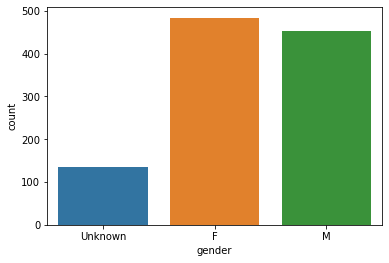

In [14]:
sns.countplot(x = "gender", data = new_df)
plt.show()
    

<AxesSubplot:xlabel='state', ylabel='income'>

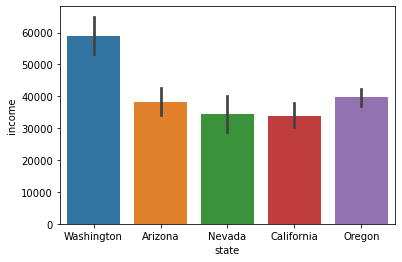

In [15]:
sns.barplot(y ='income', x='state',data=new_df)

<AxesSubplot:xlabel='policy_type', ylabel='total_claim_amount'>

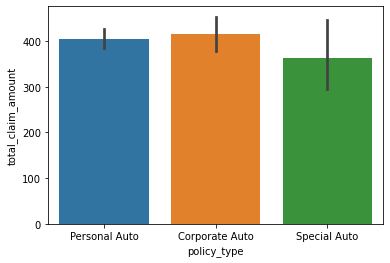

In [16]:
# Show a plot of the Policy Type by the Total Claim Amount.
sns.barplot(y ='total_claim_amount', x='policy_type',data=new_df)

<AxesSubplot:xlabel='vehicle_class', ylabel='count'>

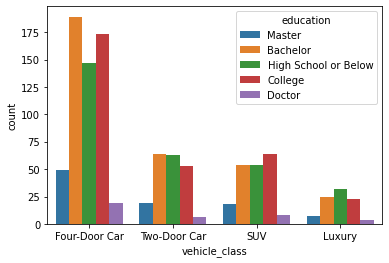

In [17]:
#Show a plot of the Education by Vehicle Class
#sns.distplot(y="education",x="vehicle_class",data=new_df)
sns.countplot(x ='vehicle_class', hue = "education", data = new_df)

In [18]:
#from the above graphs we can easily find the relationship between varibales
#to analyize the categorical data we can use countplot , box plot or distplot
# to analyze one numeric and one categorical data we can use barplot 
# other graphs may be pie plot 

In [19]:
# Check the data types of the columns. Get the numeric data into a dataframe called numerical and categorical columns in a dataframe called categorical
numerical = new_df.select_dtypes(exclude = "object")
categorical = new_df.select_dtypes(include = "object")


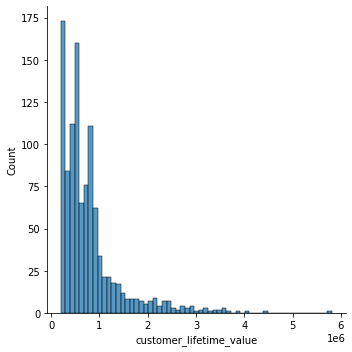

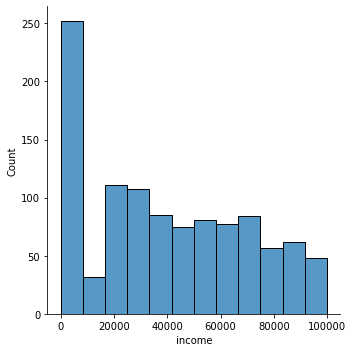

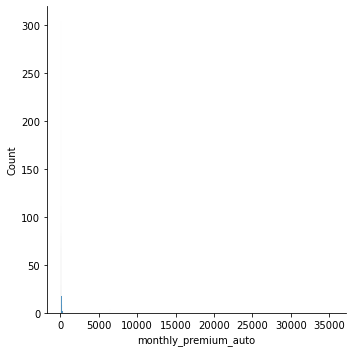

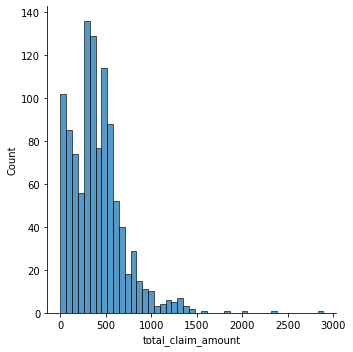

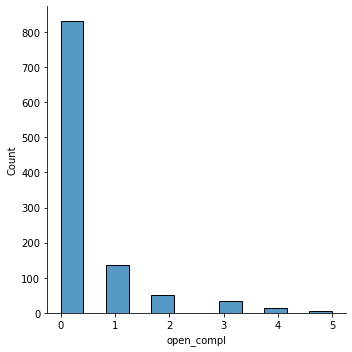

In [20]:
# for i1 in numerical:
#     sns. displot(i1, kind='kde')
#     plt.show()
for i1 in numerical:
    sns.displot(numerical[i1])
    plt.show()

customer_lifetime_value


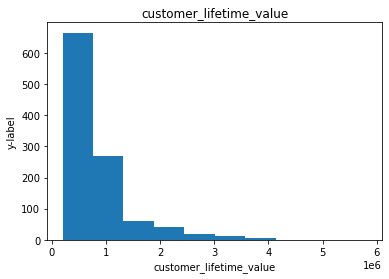

income


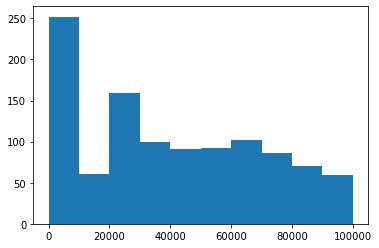

monthly_premium_auto


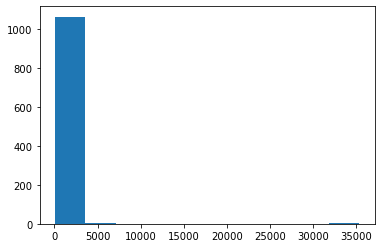

total_claim_amount


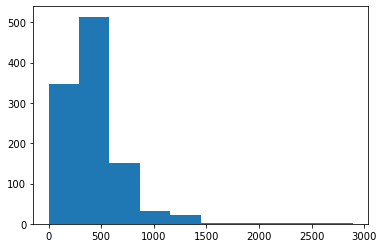

open_compl


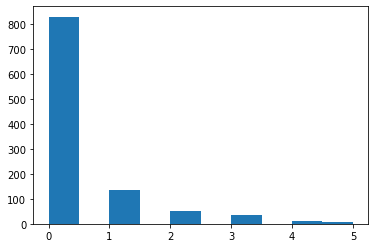

In [21]:
#Use seaborn library to construct distribution plots for the numerical variables
# Set title 
fig, ax = plt.subplots(1, 1) 
  
# adding labels 
ax.set_ylabel('y-label') 
for i in numerical:
    ax.set_title(i) 
    plt.hist(data=new_df, x=i)
    ax.set_xlabel(i) 
    print(i)
    plt.show()
    

In [22]:
# customer_life_time ---right screwed, income--not uniform,monthly_premium_amount--can not say, total_Claim_amount--uniform, open_comp-- right screwed

In [25]:
numerical_new = numerical.drop("total_claim_amount",axis=1)


<AxesSubplot:>

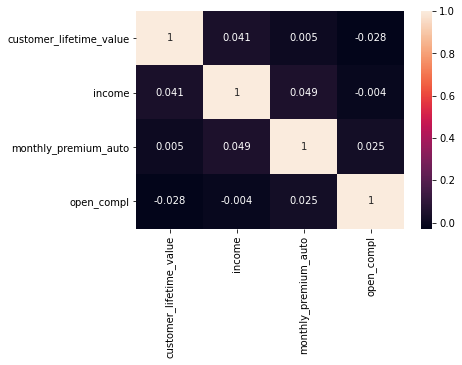

In [26]:
corr_matrix = numerical_new.corr()
sns.heatmap(corr_matrix,annot=True)

In [27]:
#here all the features are highly uncorrelated. So no need to drop any of them

In [28]:
numerical_new

,customer_lifetime_value,income,monthly_premium_auto,open_compl
0,793690,0,1000,0
1,697953,0,94,0
2,1288743,48767,108,0
3,764586,0,106,0
4,536307,36357,68,0
...,...,...,...,...
1066,2031499,63209,102,2
1067,323912,16061,88,0
1068,462680,79487,114,0
1069,899704,54230,112,0


In [29]:
categorical

,state,gender,education,policy_type,vehicle_class
0,Washington,Unknown,Master,Personal Auto,Four-Door Car
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...
1066,Oregon,F,High School or Below,Personal Auto,SUV
1067,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1068,California,F,Master,Special Auto,SUV
1069,California,F,College,Personal Auto,Two-Door Car


In [30]:
# concating numerical and categorical columns
X = pd.concat([numerical_new, categorical], axis=1)

In [31]:

y = new_df["total_claim_amount"]

In [32]:
X

,customer_lifetime_value,income,monthly_premium_auto,open_compl,state,gender,education,policy_type,vehicle_class
0,793690,0,1000,0,Washington,Unknown,Master,Personal Auto,Four-Door Car
1,697953,0,94,0,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,1288743,48767,108,0,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,764586,0,106,0,California,M,Bachelor,Corporate Auto,SUV
4,536307,36357,68,0,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...,...,...,...,...
1066,2031499,63209,102,2,Oregon,F,High School or Below,Personal Auto,SUV
1067,323912,16061,88,0,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1068,462680,79487,114,0,California,F,Master,Special Auto,SUV
1069,899704,54230,112,0,California,F,College,Personal Auto,Two-Door Car


In [33]:
#Scaling
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler

transformer = MinMaxScaler().fit(numerical_new) # numerical_new is numenical columns without target variable
x_normalized = transformer.transform(numerical_new)
print(x_normalized.shape)
x_normalized
num_Min_Max = pd.DataFrame(x_normalized, columns=numerical_new.columns)# num_Min_Max is normalized numerical data columns
num_Min_Max

(1071, 4)


,customer_lifetime_value,income,monthly_premium_auto,open_compl
0,0.105632,0.000000,0.026606,0.0
1,0.088586,0.000000,0.000935,0.0
2,0.193779,0.487865,0.001332,0.0
3,0.100450,0.000000,0.001275,0.0
4,0.059804,0.363715,0.000198,0.0
...,...,...,...,...
1066,0.326031,0.632343,0.001162,0.4
1067,0.021986,0.160674,0.000765,0.0
1068,0.046694,0.795188,0.001502,0.0
1069,0.124509,0.542517,0.001445,0.0


# one hot encoding of categorical Data ---- Customer Analysis Round 6

In [34]:
categorical

,state,gender,education,policy_type,vehicle_class
0,Washington,Unknown,Master,Personal Auto,Four-Door Car
1,Arizona,F,Bachelor,Personal Auto,Four-Door Car
2,Nevada,F,Bachelor,Personal Auto,Two-Door Car
3,California,M,Bachelor,Corporate Auto,SUV
4,Washington,M,High School or Below,Personal Auto,Four-Door Car
...,...,...,...,...,...
1066,Oregon,F,High School or Below,Personal Auto,SUV
1067,Arizona,F,Bachelor,Personal Auto,Four-Door Car
1068,California,F,Master,Special Auto,SUV
1069,California,F,College,Personal Auto,Two-Door Car


In [35]:
#one hot encoding is a way to turn categorical variables into multiple numerical columns
from sklearn.preprocessing import OneHotEncoder

# onehot encoding for state

enc = OneHotEncoder() 
  
# Passing encoded columns 
  
enc_data = enc.fit_transform(categorical[['state', 'gender','policy_type']]).toarray() 
cols = enc.get_feature_names(input_features=['state', 'gender','policy_type'])
cols
onehot_encoded = pd.DataFrame(enc_data, columns=cols)
onehot_encoded.head()



,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,gender_F,gender_M,gender_Unknown,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [36]:
#Ordinal encoding 

In [37]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_col = categorical[["education", "vehicle_class"]]
encoder_O = OrdinalEncoder()
ordinal_encoded = encoder_O.fit_transform(ordinal_col)
#cols = encoder_O.get_feature_names(input_features=["education", "vehicle_class"])
#cols
ordi_encoded = pd.DataFrame(ordinal_encoded , columns=["education", "vehicle_class"])
ordi_encoded






,education,vehicle_class
0,4.0,0.0
1,0.0,0.0
2,0.0,3.0
3,0.0,2.0
4,3.0,0.0
...,...,...
1066,3.0,2.0
1067,0.0,0.0
1068,4.0,2.0
1069,1.0,3.0


In [38]:
# concating two categorical data (ordinal and nominal)
Cat_Enc = pd.concat([onehot_encoded,ordi_encoded],axis = 1)

In [39]:
Cat_Enc

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,gender_F,gender_M,gender_Unknown,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,education,vehicle_class
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0
1067,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1068,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0
1069,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0


# Linear Regression

In [40]:
X = pd.concat([num_Min_Max,Cat_Enc],axis = 1)

In [41]:
y = new_df["total_claim_amount"]

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(856, 17)
(215, 17)
(856,)
(215,)


In [45]:
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
from sklearn.metrics import r2_score
predictions = lm.predict(X_train)
print("R2_score of training data: ",r2_score(y_train, predictions))

R2_score:  0.20887573478174803


In [55]:
predictions_test = lm.predict(X_test)
print("R2_score of testing data: ",r2_score(y_test, predictions_test))

R2_score of testing data:  0.26495538918978656


In [48]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,predictions_test)
print("mean squared Error: ",mse)

48615.37135283518

In [56]:
rmse = np.sqrt(mean_squared_error(y_test,predictions_test))
print("root mean squared Error: ",rmse)

root mean squared Error:  220.48893703048952


In [59]:
from sklearn.metrics import mean_absolute_error as mae 
MAE = mae(y_test,predictions_test)
print("Mean absolute Error: ",rmse)

Mean absolute Error:  220.48893703048952


# Some approaches you can try in this exercise

In [ ]:
#use the concept of multicollinearity and remove insignificant variables 
# I have already finished it In[27]


In [66]:
# use a different method of scaling the numerical variables 
# I have already used Mixnmax scalar
# Trying standard scaler: make data distributed with mean=0 and std=1
transformer_Std = StandardScaler().fit(numerical_new)
x_standardized_std = transformer_Std.transform(numerical_new)
print(x_standardized_std.shape)
X1 = pd.DataFrame(x_standardized_std, columns=numerical_new.columns)

(1071, 4)


In [69]:
X_new = pd.concat([X1 ,Cat_Enc], axis = 1)

In [70]:
X_new

,customer_lifetime_value,income,monthly_premium_auto,open_compl,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,gender_F,gender_M,gender_Unknown,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,education,vehicle_class
0,-0.000547,-1.290643,0.504040,-0.445053,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,4.0,0.0
1,-0.149630,-1.290643,-0.062055,-0.445053,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.770356,0.310705,-0.053307,-0.445053,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0
3,-0.045868,-1.290643,-0.054557,-0.445053,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0
4,-0.401348,-0.096799,-0.078300,-0.445053,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,1.926986,0.784933,-0.057056,1.819326,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.0,2.0
1067,-0.732092,-0.763253,-0.065804,-0.445053,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1068,-0.516001,1.319449,-0.049558,-0.445053,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,2.0
1069,0.164539,0.490092,-0.050808,-0.445053,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0


In [ ]:
#use a different ratio of train test split

In [71]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_new, y, test_size=0.3, random_state=42)

In [72]:
lm1 = linear_model.LinearRegression()
lm1.fit(X_train1,y_train1)

LinearRegression()

In [73]:
predictions_test1 = lm1.predict(X_test1)
print("R2_score of testing data: ",r2_score(y_test1, predictions_test1))

R2_score of testing data:  0.24634082823916004


In [74]:
rmse1 = np.sqrt(mean_squared_error(y_test1,predictions_test1))
print("root mean squared Error: ",rmse1)

root mean squared Error:  243.6363947701577
